<h1> <b> Purpose of this analysis</b></h1>
Purpose of this mini project is to experiment some of data wrangling techniques. We have rcieved Lending Club Loan Data set from 2007 to 2015. There are total 2.2 million rows and 145 columns. It is important to do some pre-processing work in order to analyze data and fill out missing values.  

<h1> <b> Packages</b></h1>
We will start by importing some of packages. Following packages will be imported.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_style('whitegrid')

Now we will be reading data from "Loan.csv" to Pandas Dataframe.

In [17]:
file = "Loan_cleandata.csv"
data_list = []
for chunk in pd.read_csv("Loan_cleandata.csv", low_memory=False, chunksize=100000):
    data_list.append(chunk)
loan_data = pd.concat(data_list)
del data_list

# create train and test dataset. All laons that are current will be test dataset.



Let's quickly check the shape of data.This will give us idea as how large is current dataset. As we can see, current data set contains more than 2 million rows and 145 columns. Not all columns are useful for our analysis. 

In [18]:
# print(list(data.columns))
print(loan_data.head())

   Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           0       2500         2500           2500.0   36 months     13.56   
1           1      30000        30000          30000.0   60 months     18.94   
2           2       5000         5000           5000.0   36 months     17.97   
3           3       4000         4000           4000.0   36 months     18.94   
4           4      30000        30000          30000.0   60 months     16.14   

   installment grade sub_grade       emp_title  emp_length home_ownership  \
0        84.92     C        C1            Chef          10           RENT   
1       777.23     D        D2     Postmaster           10       MORTGAGE   
2       180.69     D        D1  Administrative           6       MORTGAGE   
3       146.51     D        D2   IT Supervisor          10       MORTGAGE   
4       731.78     C        C4        Mechanic          10       MORTGAGE   

   annual_inc verification_status   issue_d loan_status 

In [19]:
loan_data.drop(loan_data.columns[0], axis=1, inplace = True)
print(loan_data.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'a

In [24]:
test_data = loan_data[loan_data['loan_status'] == 'Current']
print(test_data.shape)

(768461, 100)


In [25]:
index = loan_data[loan_data['loan_status'] == 'Current'].index
train_data = loan_data.drop(index)
print(train_data.shape)

(1085612, 100)


In [27]:
test_data.to_csv('test_data.csv')
train_data.to_csv('train_data.csv')

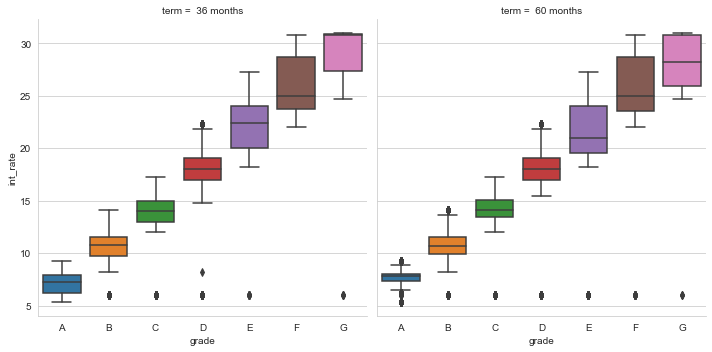

In [5]:
sns.catplot(x='grade', y = 'int_rate', data = loan_data, kind='box', order = sorted(loan_data['grade'].unique()), col='term')

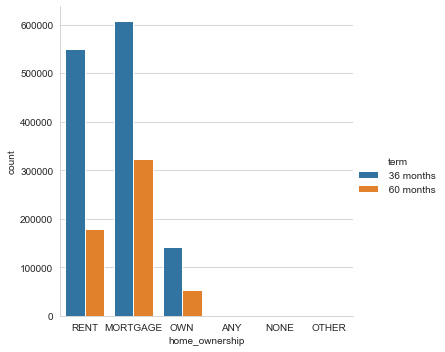

In [8]:
print(loan_data['loan_status'].value_counts())
loan_data['status_var'] = loan_data['loan_status'].map({'Fully Paid':0, 'Current':0, 'Charged Off':1, 'Late (31-120 days)':1, \
                                                        'In Grace Period':1, 'Late (16-30 days)':1, 'Default':1})
print(loan_data['status_var'].value_counts())

Fully Paid            851566
Current               768461
Charged Off           206324
Late (31-120 days)     17420
In Grace Period         7408
Late (16-30 days)       2867
Default                   27
Name: loan_status, dtype: int64
0    1620027
1     234046
Name: status_var, dtype: int64


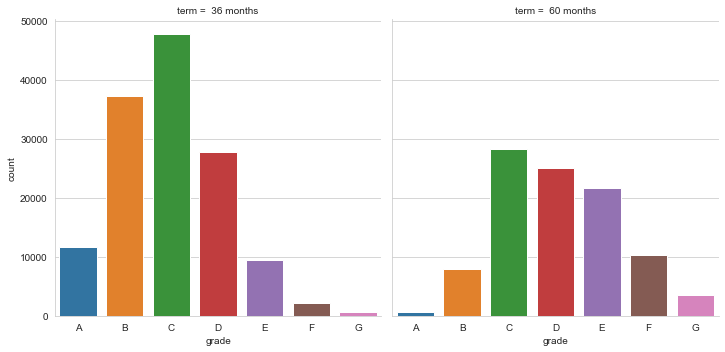

In [15]:
sns.catplot( x = 'grade', data = loan_data[loan_data['status_var']==1], kind = 'count', \
            order = sorted(loan_data['grade'].unique()), col='term')

Text(0, 0.5, 'loan amount')

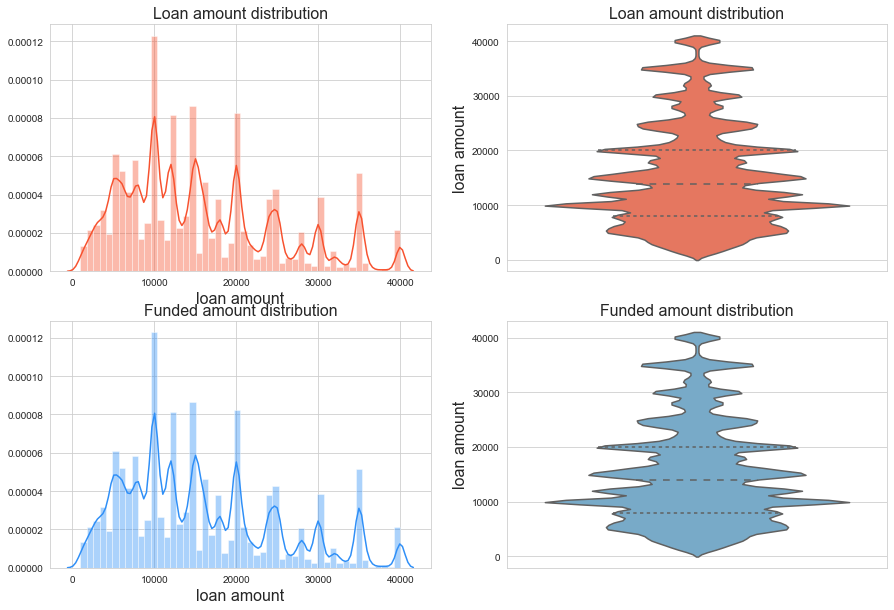

In [16]:
f_loan, ax_loan = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(loan_data["loan_amnt"], ax=ax_loan[0, 0], color="#F7522F")
sns.violinplot(y=loan_data["loan_amnt"], ax=ax_loan[0, 1], inner="quartile", palette="Reds")
sns.distplot(loan_data["funded_amnt"], ax=ax_loan[1, 0], color="#2F8FF7")
sns.violinplot(y=loan_data["funded_amnt"], ax=ax_loan[1, 1], inner="quartile", palette="Blues")
ax_loan[0, 0].set_title("Loan amount distribution", fontsize=16)
ax_loan[0, 1].set_title("Loan amount distribution", fontsize=16)
ax_loan[1, 0].set_title("Funded amount distribution", fontsize=16)
ax_loan[1, 1].set_title("Funded amount distribution", fontsize=16)
ax_loan[0, 0].set_xlabel("loan amount", fontsize=16)
ax_loan[1, 0].set_xlabel("loan amount", fontsize=16)
ax_loan[0, 1].set_ylabel("loan amount", fontsize=16)
ax_loan[1, 1].set_ylabel("loan amount", fontsize=16)

IndexError: too many indices for array

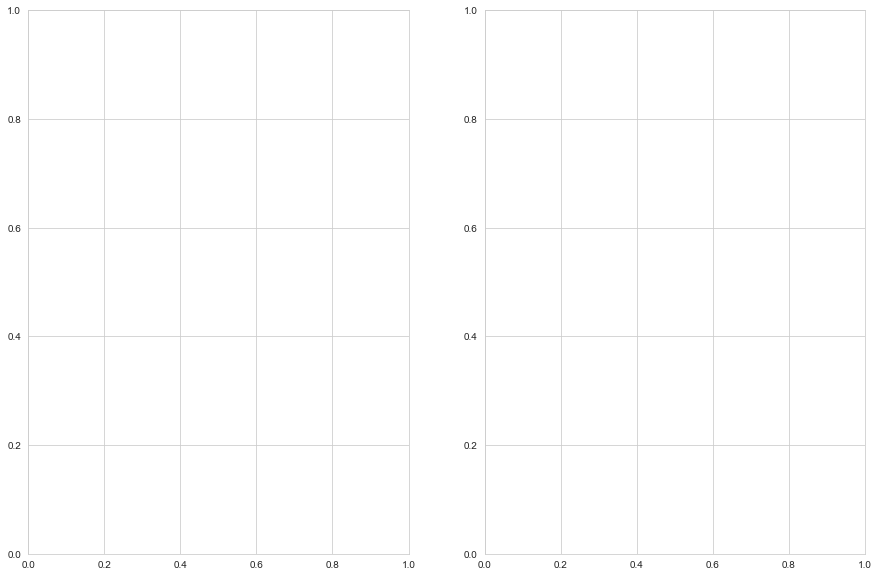

In [22]:
loan_data['year'] = pd.to_datetime(loan_data['issue_d']).dt.year
loan_year_num = loan_data['year'].value_counts().to_dict()
loan_year_num_pd = pd.DataFrame(list(loan_year_num.items()), columns=["year", "loan times"])
loan_year_num_pd.sort_values("year", inplace=True)
# print(loan_year_num_pd)
loan_money_count_per_year = loan_data.groupby("year")["loan_amnt"].sum().to_dict()
loan_money_count_per_year_pd = pd.DataFrame(list(loan_money_count_per_year.items()), columns=["year", "loan_amnt"])
loan_money_count_per_year_pd.sort_values("year", inplace=True)
# print(loan_money_count_per_year_pd)

fig, ax= plt.subplots(1,2, figsize = (15,10))
sns.catplot(x='year', y = 'loan times', data = loan_year_num_pd, palette = 'tab10', kind='bar', ax=ax[0,0])
sns.catplot(x='year', y = 'loan_amnt', data = loan_money_count_per_year_pd, palette = 'tab10', kind='bar', ax=ax[0,1] )

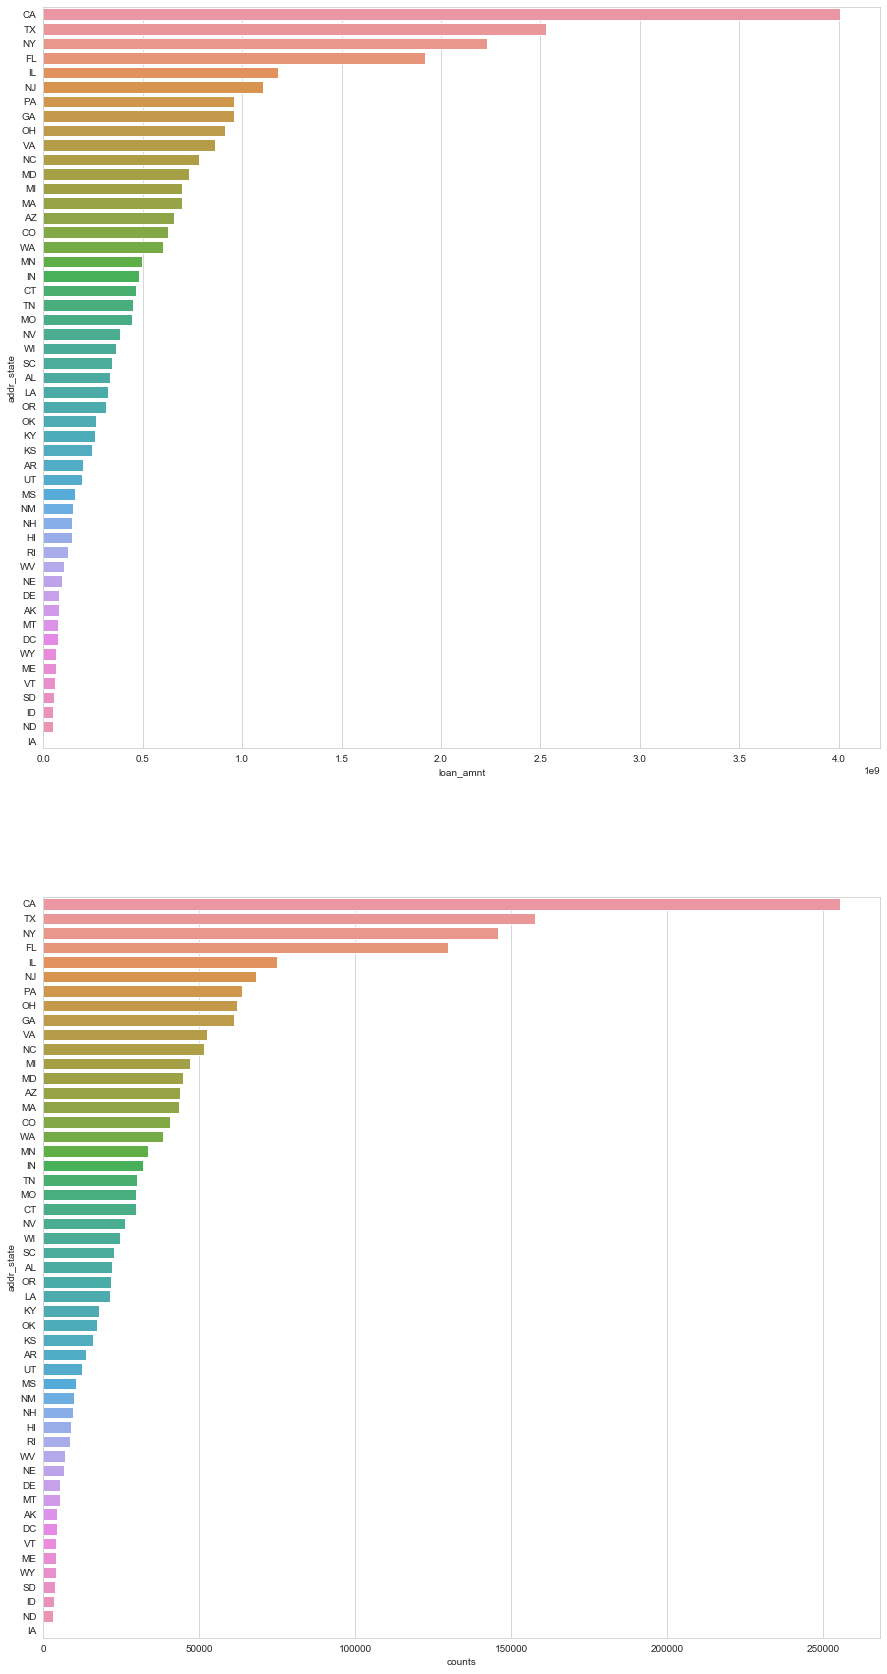

In [12]:

loan_amnt_per_state = loan_data[['addr_state', 'loan_amnt']].groupby('addr_state').sum().sort_values(by='loan_amnt', ascending=False).reset_index()
# print(loan_amnt_per_state)
loan_per_state = loan_data['addr_state'].value_counts().rename_axis('addr_state').reset_index(name='counts')
# print(loan_per_state)
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,30))
sns.barplot(x='loan_amnt', y = 'addr_state', data = loan_amnt_per_state, orient = 'h', ax=ax1 )
sns.barplot(x='counts', y = 'addr_state', data = loan_per_state, orient = 'h', ax=ax2 )

In [ ]:
# loan_amnt_per_job = loan_data[['emp_title', 'loan_amnt']].groupby('emp_title').mean().sort_values(by = 'loan_amnt', ascending = False).reset_index()
# loan_per_job = loan_data['emp_title'].value_counts().rename_axis('emp_title').reset_index(name = 'counts')
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,30))
# sns.barplot(x='loan_amnt', y = 'emp_title', data = loan_amnt_per_job, orient = 'h', ax=ax1 )
# sns.barplot(x='counts', y = 'emp_title', data = loan_per_job, orient = 'h', ax=ax2 )
